In [1]:
library(stringr)
library(ISLR)
library(gmodels)

pfn = "intro_to_stat_learning"
curr_dir = getwd()

project_path = file.path(
    substr(curr_dir, 0, unlist(gregexpr(pfn, curr_dir))[1] - 2),
    pfn
)

data_fold = file.path(project_path, "data_folder")
college_dir = file.path(data_fold, "College.csv")

# Задание 8

### 8.a Загрузка данных с использование read.csv

Набор данных College я нашел в библиотеке ISLR потому для его загрузки в виде .csv надо его сначала сохранить в виде .csv

In [2]:
data(College)
write.csv(College, college_dir)

Теперь можно загружать

In [3]:
College = read.csv(college_dir)
College

X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80


### 8.b Узнаем данные College поближе

In [4]:
# сделает первый столбец с названием типо
# pandas.Index
rownames(College) = College[,1] 
# Открыть окошко с данными.
# в jupyter эта команда не так актуальна.
#fix(College)
# удалим столбец с названиями из данных 
# используемых для вычисления
College = College[,-1]
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80


## 8.c

#### I `summary()`

In [5]:
summary(College)

   Private               Apps           Accept          Enroll    
 Length:777         Min.   :   81   Min.   :   72   Min.   :  35  
 Class :character   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242  
 Mode  :character   Median : 1558   Median : 1110   Median : 434  
                    Mean   : 3002   Mean   : 2019   Mean   : 780  
                    3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902  
                    Max.   :48094   Max.   :26330   Max.   :6392  
   Top10perc       Top25perc      F.Undergrad     P.Undergrad     
 Min.   : 1.00   Min.   :  9.0   Min.   :  139   Min.   :    1.0  
 1st Qu.:15.00   1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0  
 Median :23.00   Median : 54.0   Median : 1707   Median :  353.0  
 Mean   :27.56   Mean   : 55.8   Mean   : 3700   Mean   :  855.3  
 3rd Qu.:35.00   3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0  
 Max.   :96.00   Max.   :100.0   Max.   :31643   Max.   :21836.0  
    Outstate       Room.Board       Books           Personal  

#### II `pairs()`

Первый столбик категориальная переменная, потому приходиться использовать с певого по 11. График получался маленький потому записал его в `college_pairs.pdf`

In [6]:
pdf("college_pairs.pdf")
pairs(College[,2:11])
dev.off()

png 
  2

#### III Создание новой переменной

In [7]:
Elite = rep("No", nrow(College))
Elite[College$Top10perc > 50] = "Yes"
Elite = as.factor(Elite)
College = data.frame(College, Elite)

In [8]:
summary(Elite)

No Yes 
699  78

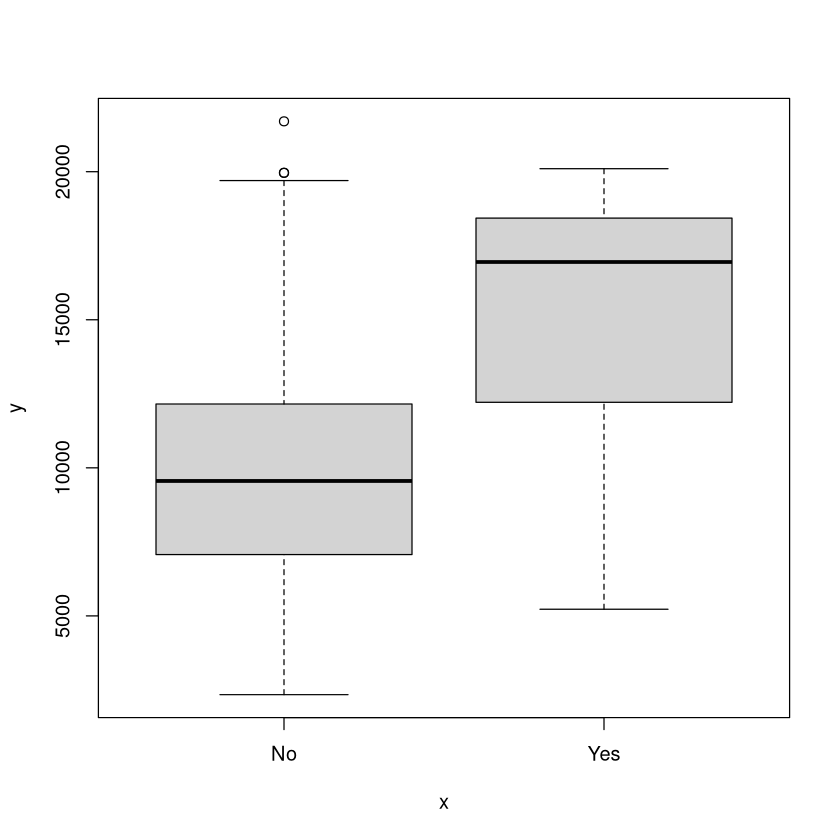

In [9]:
plot(College, x = College$Elite, y = College$Outstate)

#### IV Гистограммы

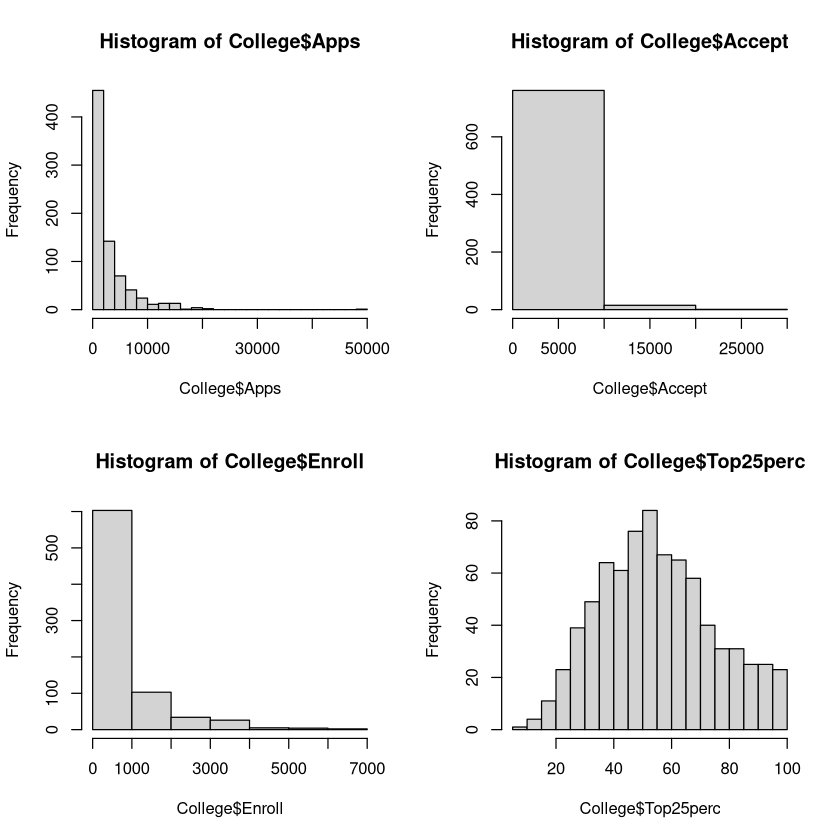

In [10]:
par(mfrow = c(2,2))

hist(College$Apps,breaks = 30)
hist(College$Accept,breaks = 3)
hist(College$Enroll,breaks = 5)
hist(College$Top25perc, breaks = 14)

#### V Поиск находок

Похоже в универы которые мы назвали элитными приходит впринципе больше учеников.

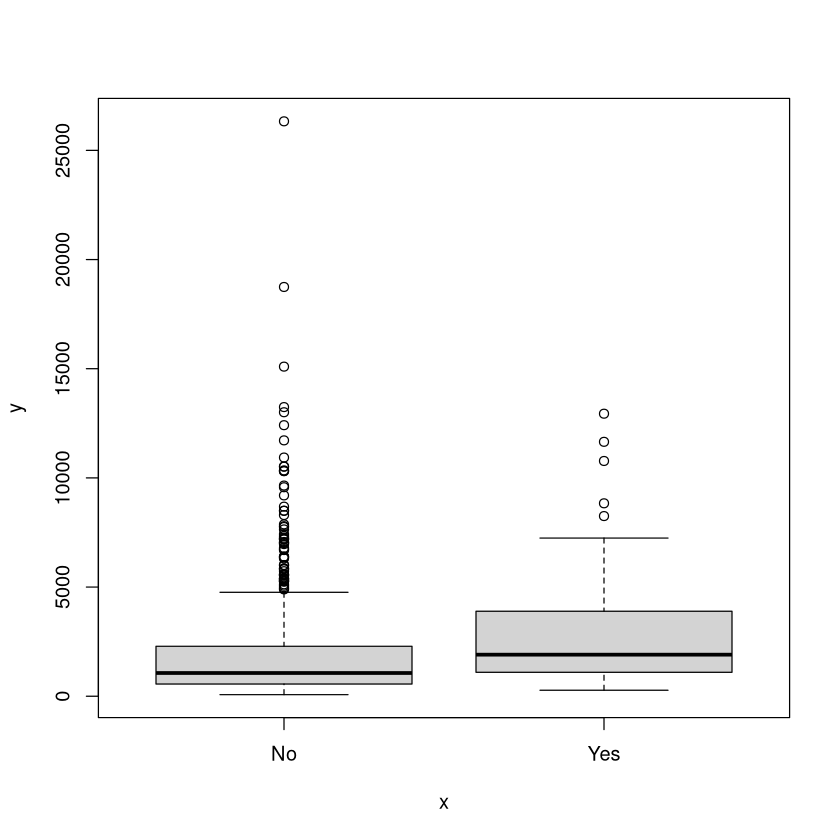

In [11]:
plot(College$Elite, College$Accept)

Ну и понятно, в элитных универах больше перподов PhD

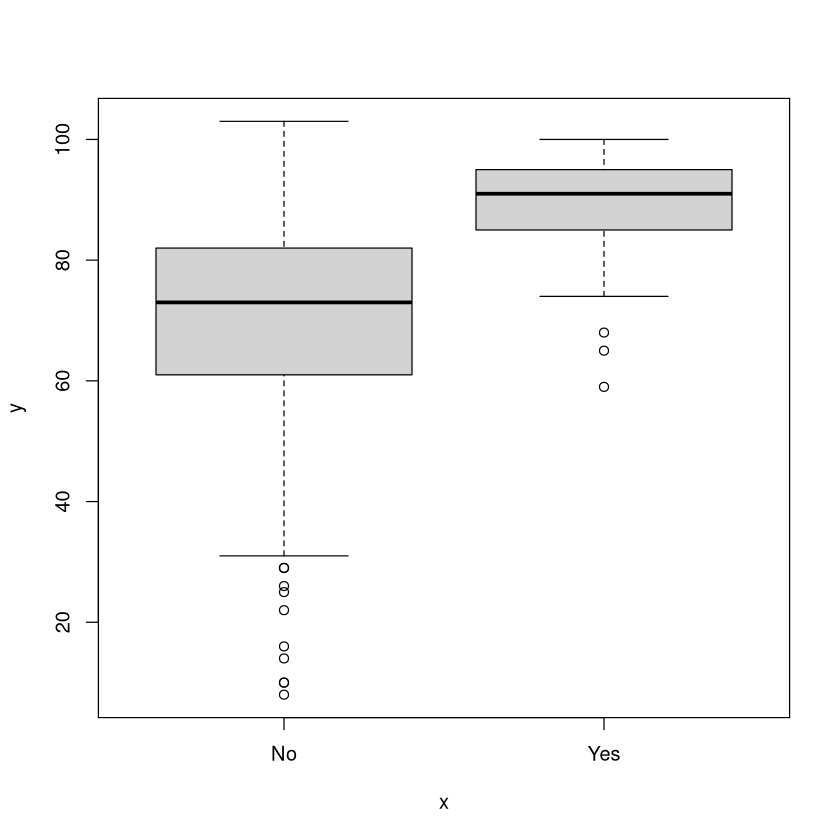

In [12]:
plot(College$Elite, College$PhD)

In [13]:
CrossTable(College$Elite, College$Private)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  777 

 
              | College$Private 
College$Elite |        No |       Yes | Row Total | 
--------------|-----------|-----------|-----------|
           No |       199 |       500 |       699 | 
              |     0.360 |     0.135 |           | 
              |     0.285 |     0.715 |     0.900 | 
              |     0.939 |     0.885 |           | 
              |     0.256 |     0.644 |           | 
--------------|-----------|-----------|-----------|
          Yes |        13 |        65 |        78 | 
              |     3.223 |     1.209 |           | 
              |     0.167 |     0.833 |     0.100 | 
              |     0.061 |     0.115 |           | 
              |     0.017 |     0.084 |           | 
--------------|--------

# Задание 9

### Подготовка

In [14]:
data(Auto)
# убеждаемся, что нету пропусков
Auto = na.omit(Auto)

### 9.a

Тип перепенных определяется по их смыслу, можно просто запросить описание набора данных:

In [15]:
?Auto

Auto {ISLR},R Documentation


Как результат факторизуем переменные `cylinders`, `year`, `origin`

In [50]:
Auto$cylinders = as.factor(Auto$cylinders)
Auto$origin = as.factor(Auto$origin)
Auto$year = as.factor(Auto$year)

### 9.b

Moжно исопльзовать функцию range но придется возиться к чему ее применить куда удопнее воспользоваться `summary` и там смотреть, на показатели `min` и `max` численных переменных 

In [17]:
summary(Auto)

      mpg        cylinders  displacement     horsepower        weight    
 Min.   : 9.00   3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   5:  3     Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60             Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                         
  acceleration        year       origin                  name    
 Min.   : 8.00   Min.   :70.00   1:245   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   2: 68   ford pinto        :  5  
 Median :15.50   Median :76.00   3: 79   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98           amc gremlin       :  4  
 3rd Qu.:17.02   3rd Qu.:79.00           amc hornet        :  4  
 Max.   :24.

### 9.c

Получим условие отбора численных переменных;

In [18]:
numeric_condition = unlist(lapply(Auto, is.numeric))

Средние числа

In [19]:
lapply(Auto[,numeric_condition], mean)

$mpg
[1] 23.44592

$displacement
[1] 194.412

$horsepower
[1] 104.4694

$weight
[1] 2977.584

$acceleration
[1] 15.54133

$year
[1] 75.97959

Стандартное отклонение

In [20]:
lapply(Auto[,numeric_condition], sd)

$mpg
[1] 7.805007

$displacement
[1] 104.644

$horsepower
[1] 38.49116

$weight
[1] 849.4026

$acceleration
[1] 2.758864

$year
[1] 3.683737

### 9.d

Как изменятся описательные статистики в случае если опустить 10ю и 85ю записи?

In [21]:
lapply(Auto[c(-10, -85), numeric_condition], range)

$mpg
[1]  9.0 46.6

$displacement
[1]  68 455

$horsepower
[1]  46 230

$weight
[1] 1613 5140

$acceleration
[1]  8.0 24.8

$year
[1] 70 82

In [22]:
lapply(Auto[c(-10, -85), numeric_condition], mean)

$mpg
[1] 23.49436

$displacement
[1] 193.5115

$horsepower
[1] 104.0692

$weight
[1] 2972.469

$acceleration
[1] 15.5659

$year
[1] 76.00256

In [25]:
lapply(Auto[c(-10, -85), numeric_condition], sd)

$mpg
[1] 7.795198

$displacement
[1] 104.1407

$horsepower
[1] 38.17633

$weight
[1] 848.5121

$acceleration
[1] 2.739672

$year
[1] 3.677556

### 9.e

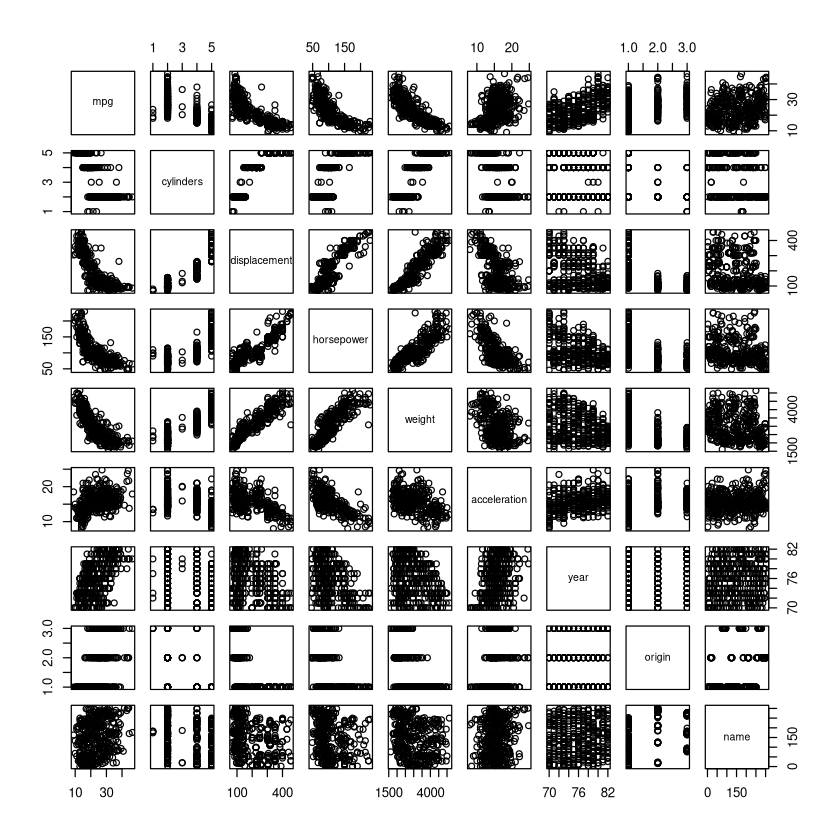

In [26]:
pairs(Auto)

Заметная линейная связь между объемом двигатеря и количеством лошадиных сил

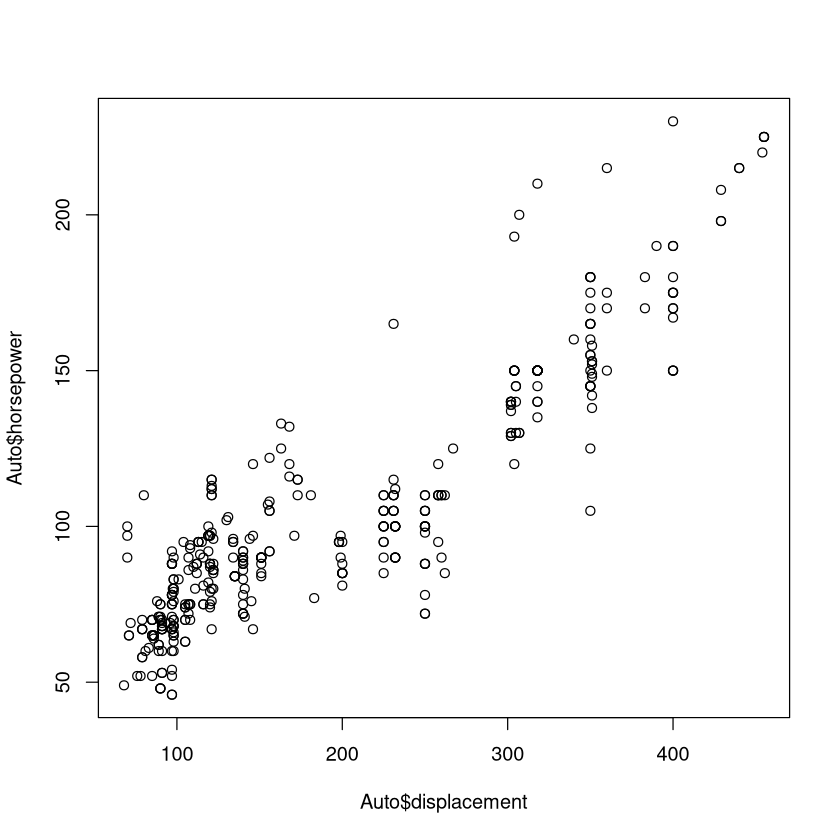

In [27]:
plot(Auto$displacement, Auto$horsepower)

Больше цилиндровые двигатели имеют больший объем

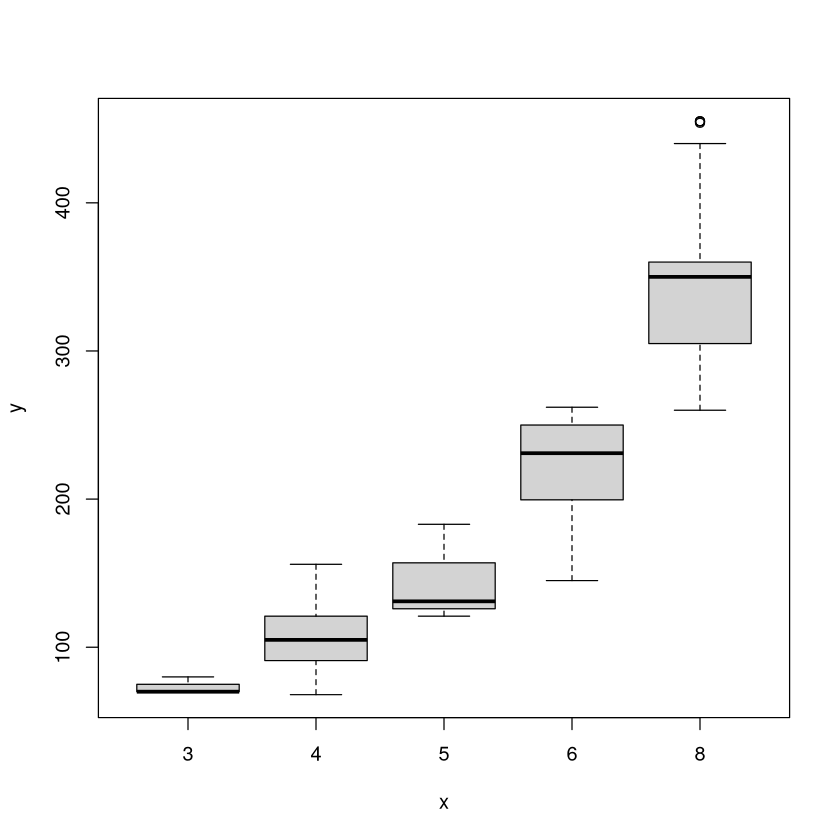

In [28]:
plot(Auto$cylinders, Auto$displacement)

### 9.f

In [52]:
?plot

plot {base},R Documentation
x,"the coordinates of points in the plot. Alternatively, a single plotting structure, function or any R object with a plot method can be provided."
y,"the y coordinates of points in the plot, optional if x is an appropriate structure."
...,"Arguments to be passed to methods, such as graphical parameters (see par). Many methods will accept the following arguments: typewhat type of plot should be drawn. Possible types are ""p"" for points, ""l"" for lines, ""b"" for both, ""c"" for the lines part alone of ""b"", ""o"" for both ‘overplotted’, ""h"" for ‘histogram’ like (or ‘high-density’) vertical lines, ""s"" for stair steps, ""S"" for other steps, see ‘Details’ below, ""n"" for no plotting. All other types give a warning or an error; using, e.g., type = ""punkte"" being equivalent to type = ""p"" for S compatibility. Note that some methods, e.g. plot.factor, do not accept this. mainan overall title for the plot: see title. suba sub title for the plot: see title. xlaba title for the x axis: see title. ylaba title for the y axis: see title. aspthe y/x aspect ratio, see plot.window."


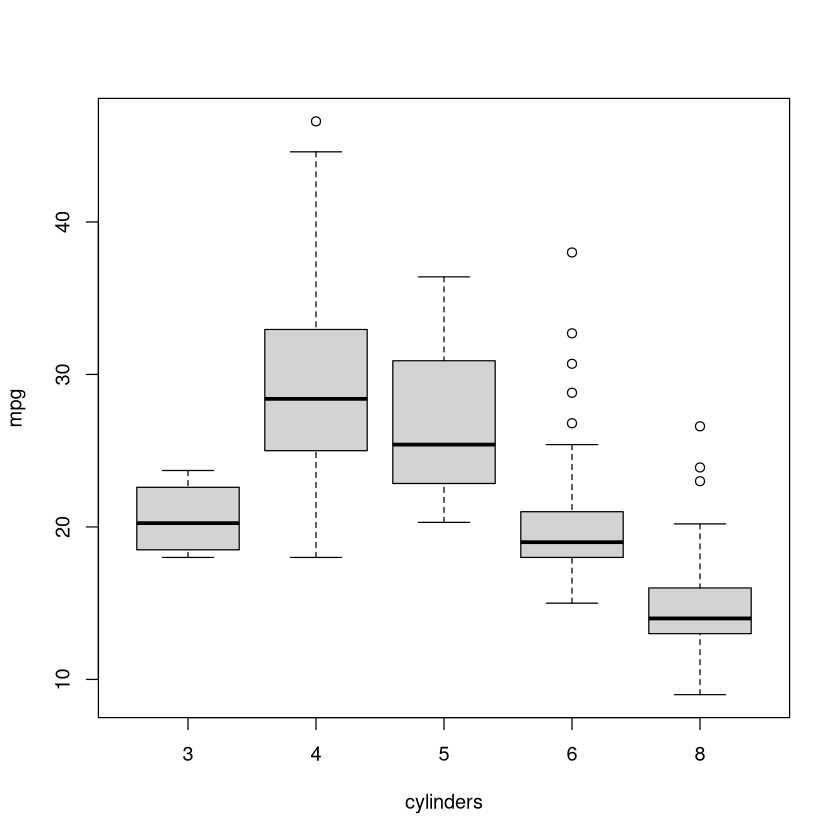

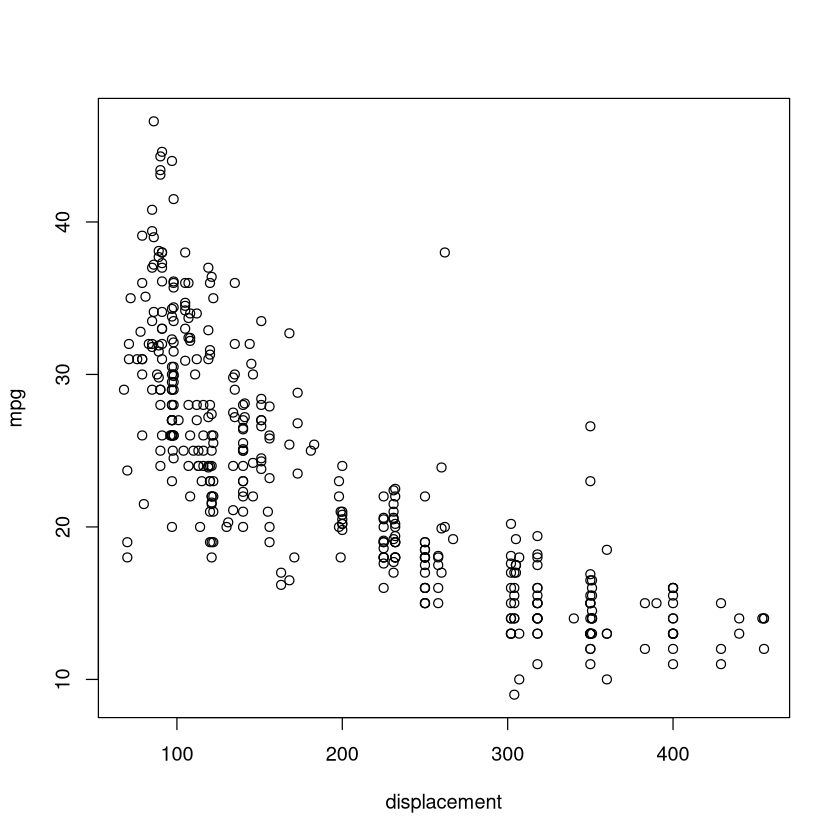

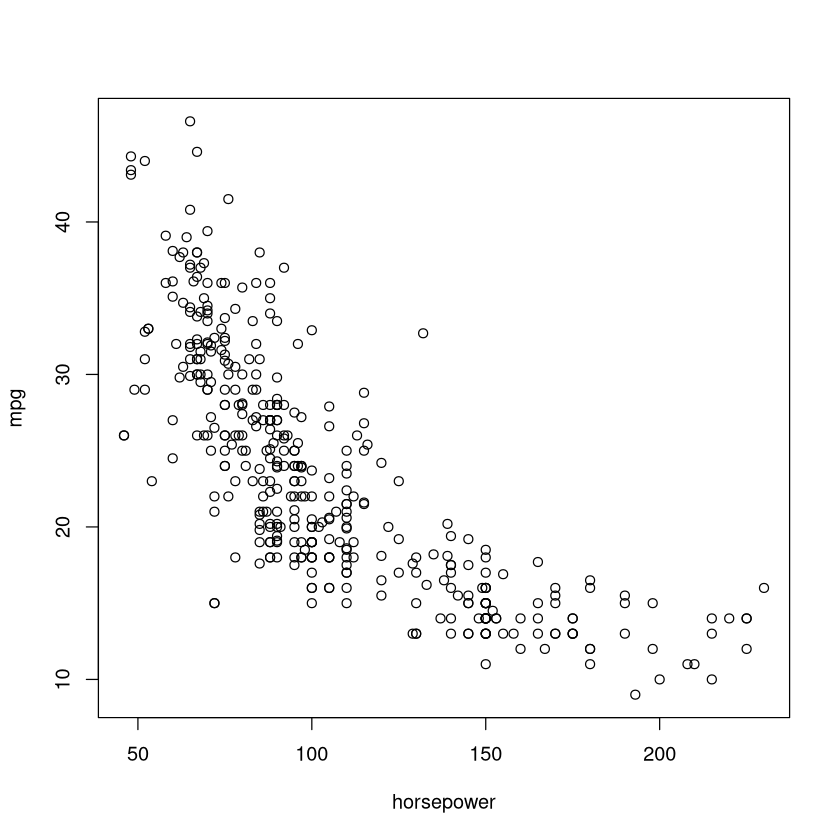

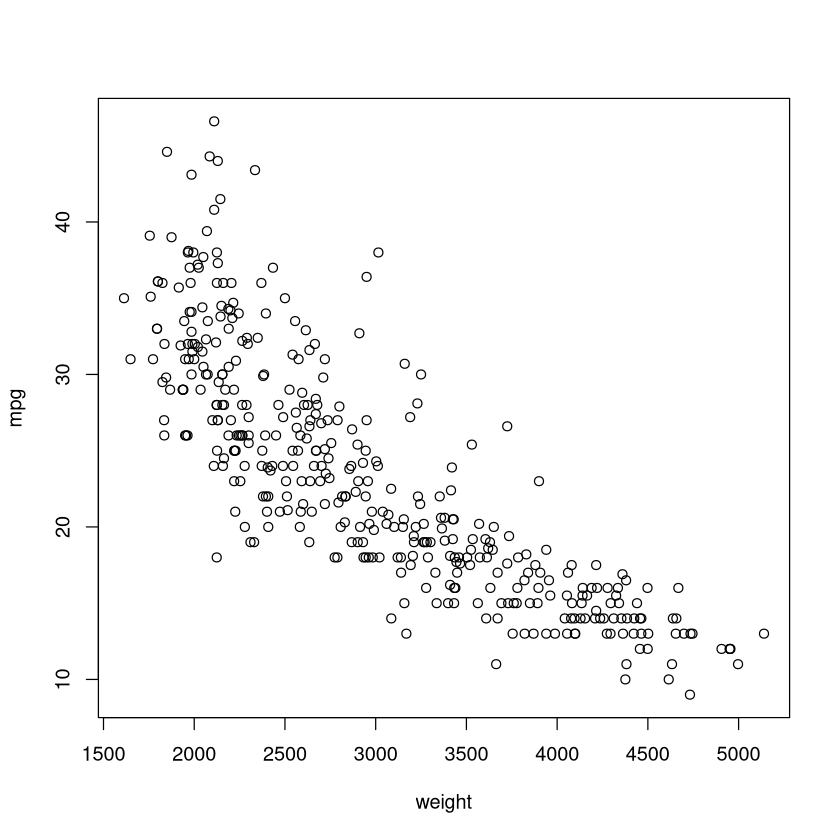

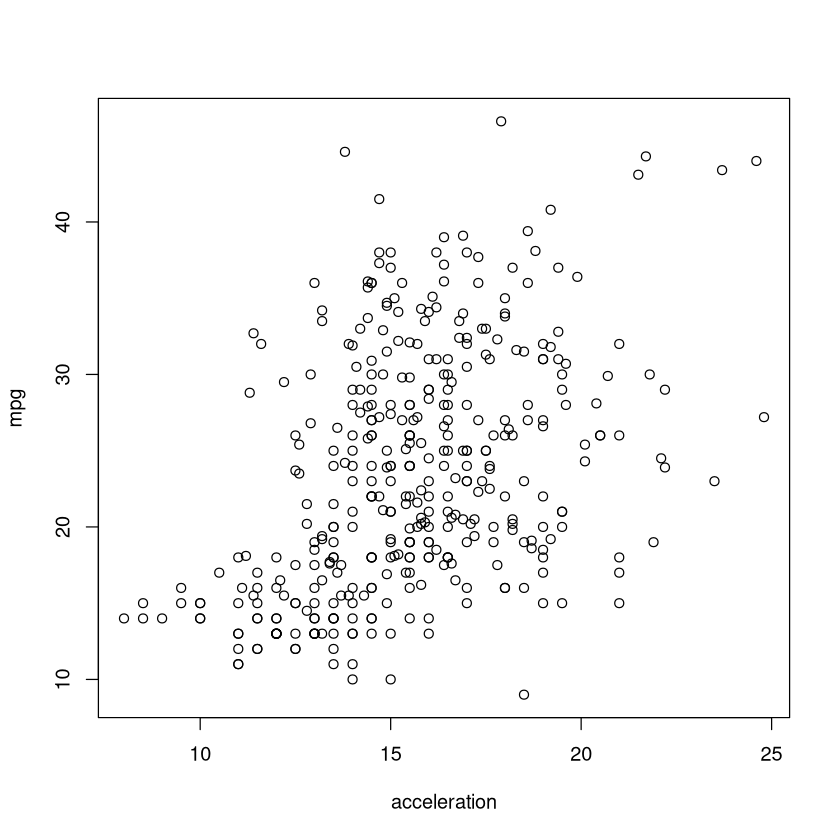

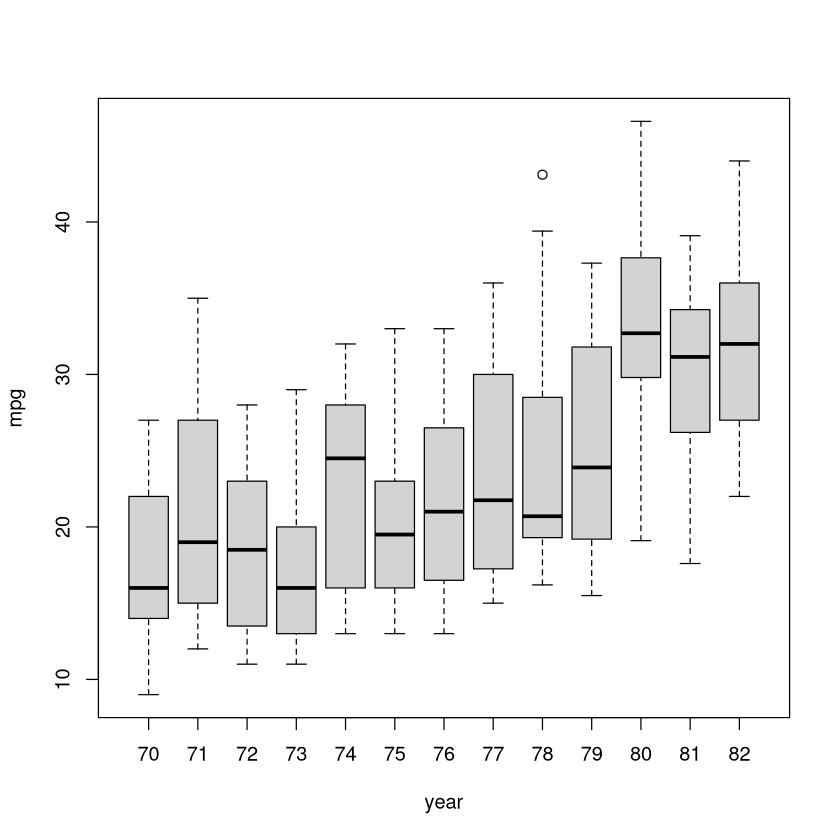

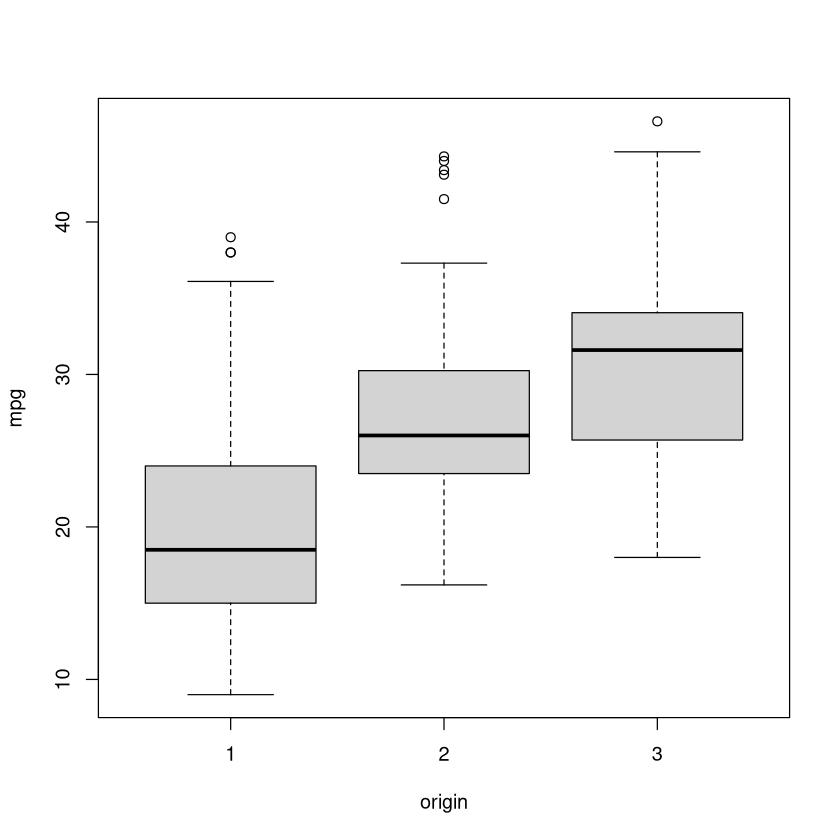

In [54]:
#Auto[,2:ncol(Auto)-1]

for (col_ind in 2:8)
{
    plot(
        Auto[, col_ind], Auto$mpg, 
        xlab = colnames(Auto)[col_ind],
        ylab = "mpg"
    ) 
}

Как и ожидалось от модельного набора данных все почти все переменные так или иначе дают возможности к предстазанию mpg. Так как для разных значений объясняющих переменных соответсвуют, в среднем разные, значения объясняемой переменной.